In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [22]:
# Set parameters for better visualization
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [67]:
df = pd.read_csv("OnionMarketData.csv")
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
0,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,01-01-2022
1,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,01-03-2022
2,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,01-04-2022
3,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,01-05-2022
4,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,01-06-2022


In [24]:
# change the date column to time interval column
df.date = pd.DatetimeIndex(df.date_arrival)

<ipython-input-24-3b61c2bd3094>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.date = pd.DatetimeIndex(df.date_arrival)


In [25]:
# change the index to date column
df.index = pd.PeriodIndex(df.date, freq="D")
df.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
date_arrival,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,01-01-2022
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,01-03-2022
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,01-04-2022
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,01-05-2022
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,01-06-2022


In [26]:
df_red = df.loc[df.Variety == "Red"].copy()
df_red.head(50)

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival
date_arrival,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,01-01-2022
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,01-03-2022
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,01-04-2022
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,01-05-2022
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,01-06-2022
2022-01-07,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2639,700,2491,2180,01-07-2022
2022-01-08,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2316,700,2500,2051,01-08-2022
2022-01-10,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2441,800,2353,2070,01-10-2022
2022-01-11,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2722,800,2564,2075,01-11-2022


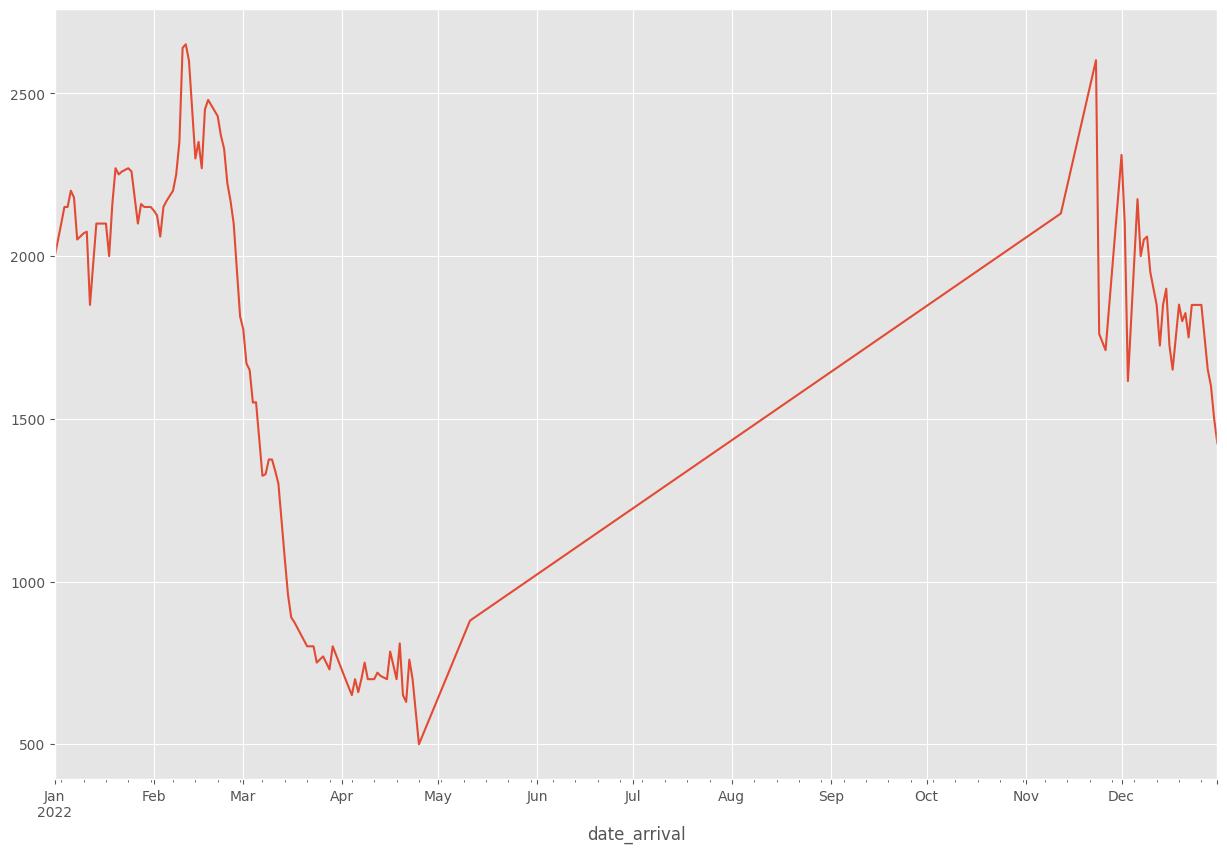

In [27]:
df_red.MODAL.plot()
plt.show()

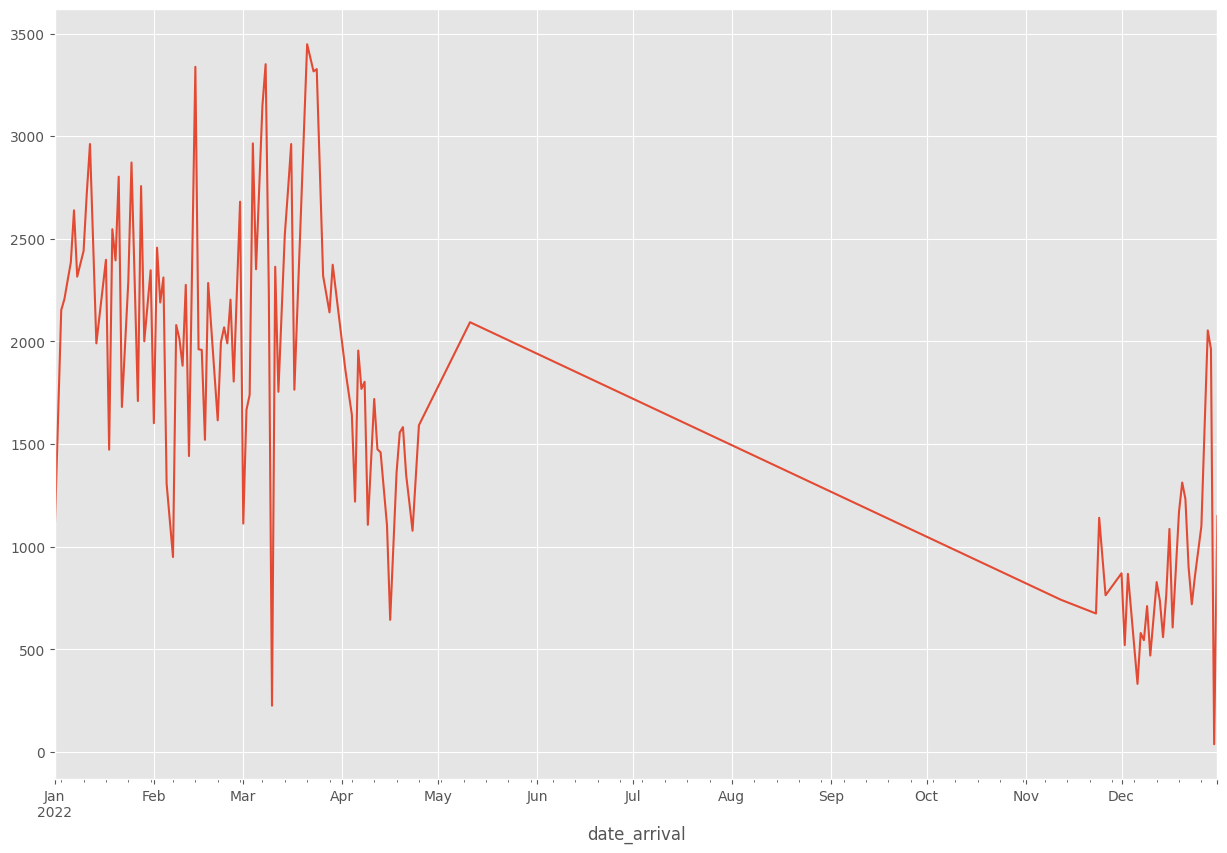

In [28]:
df_red.Arrival.plot()
plt.show()

<Axes: ylabel='Frequency'>

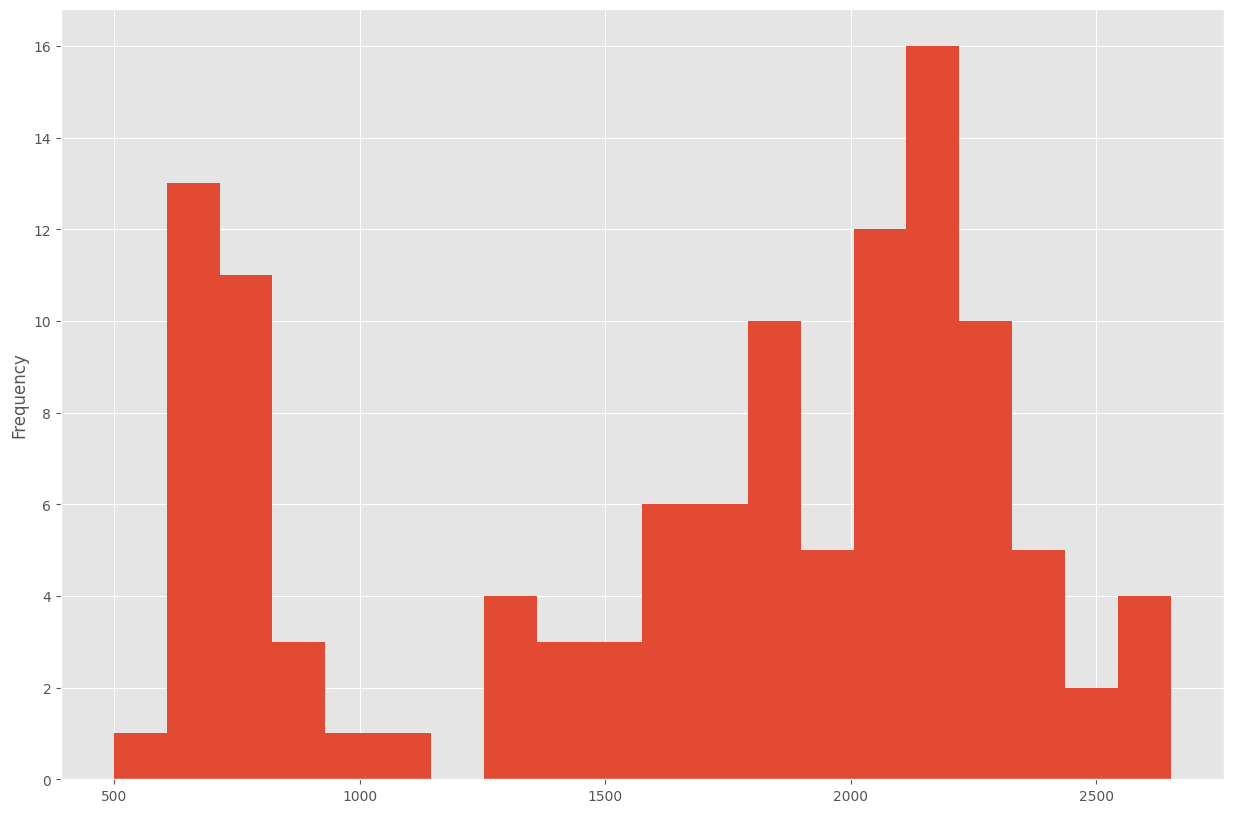

In [29]:
df_red.MODAL.plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

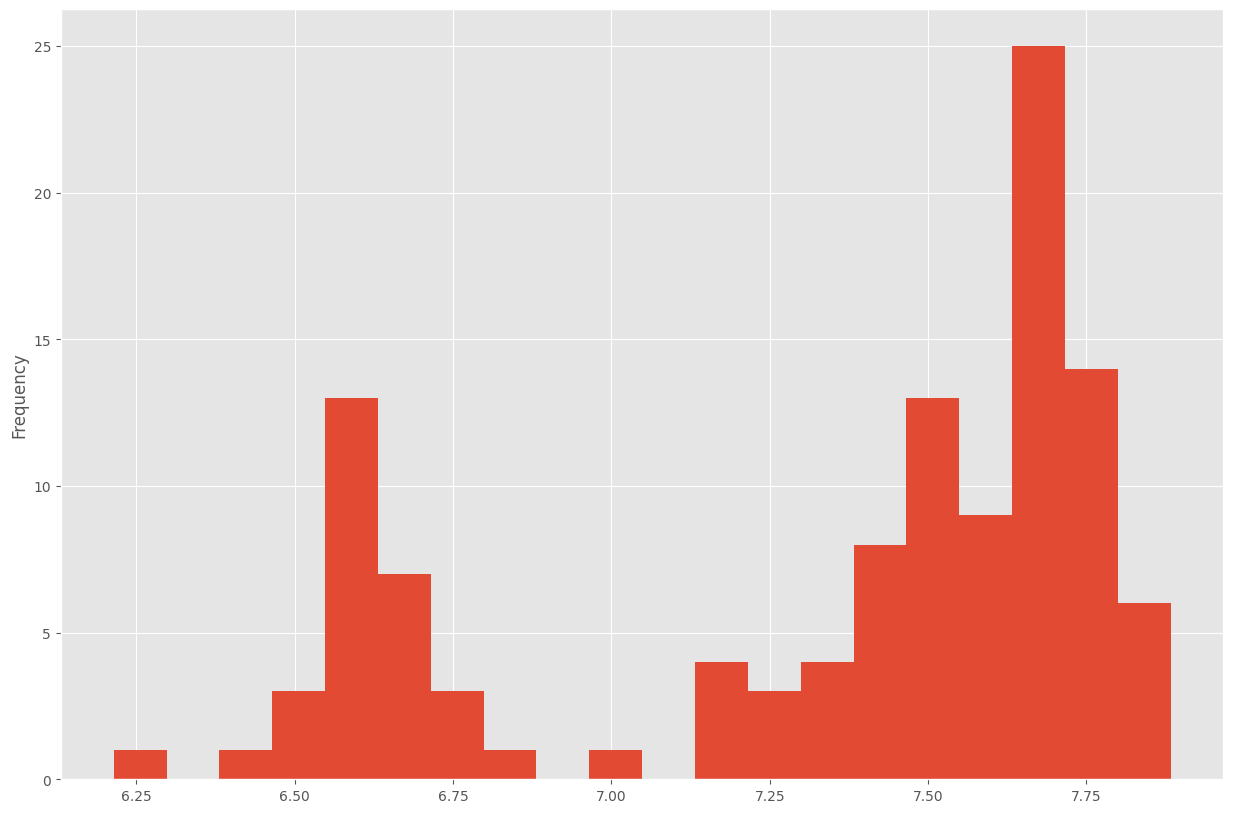

In [30]:
df_red["log_MODAL"] = np.log(df_red.MODAL)
df_red.log_MODAL.plot(kind="hist", bins=20)

<Axes: xlabel='date_arrival'>

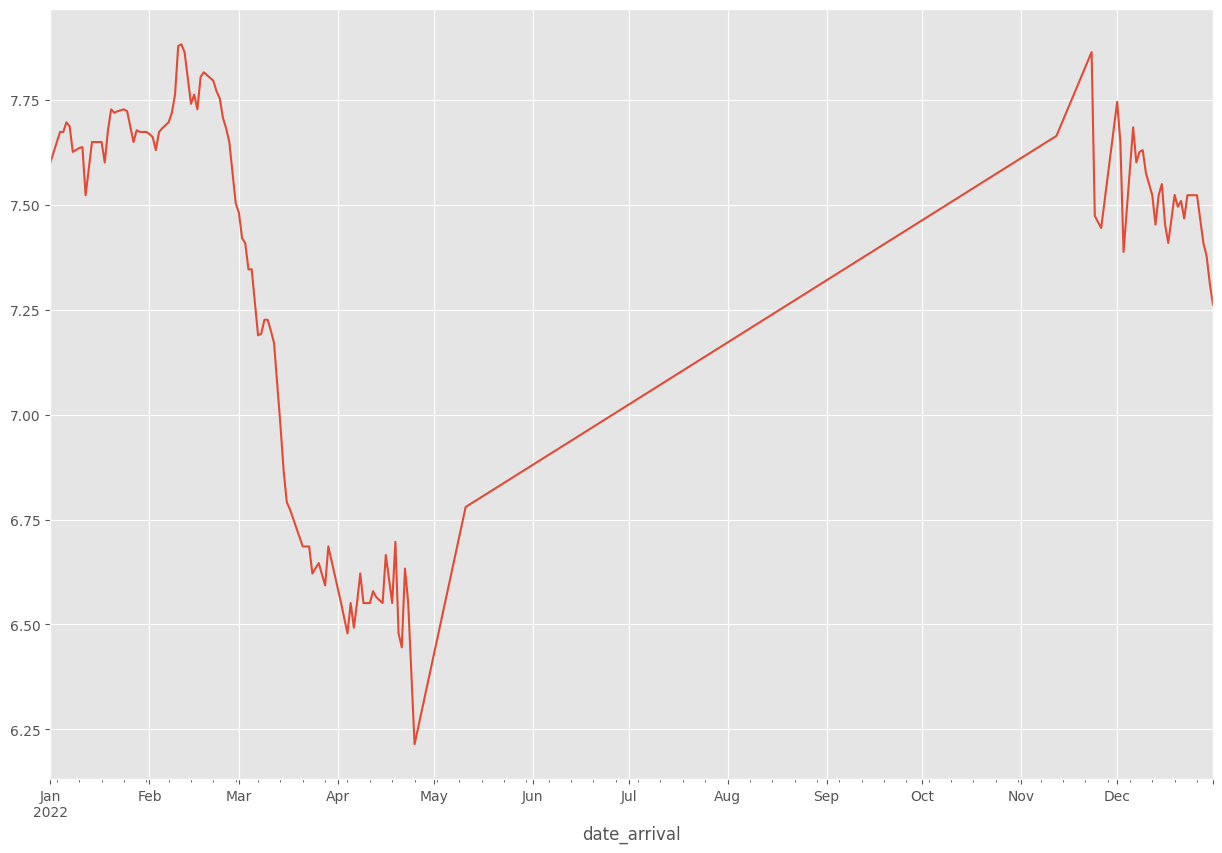

In [42]:
df_red.log_MODAL.plot()

In [37]:
# Mean Constant model
df_red_mean = df_red.log_MODAL.mean()
df_red["mean_price"] = np.exp(df_red_mean)
df_red.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price
date_arrival,,,,,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,01-01-2022,7.601402,NaN,NaN,1533.51086
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,01-03-2022,7.649693,7.601402,0.048290,1533.51086
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,01-04-2022,7.673688,7.649693,0.023996,1533.51086
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,01-05-2022,7.673688,7.673688,0.000000,1533.51086
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,01-06-2022,7.696667,7.673688,0.022979,1533.51086


<Axes: xlabel='date_arrival'>

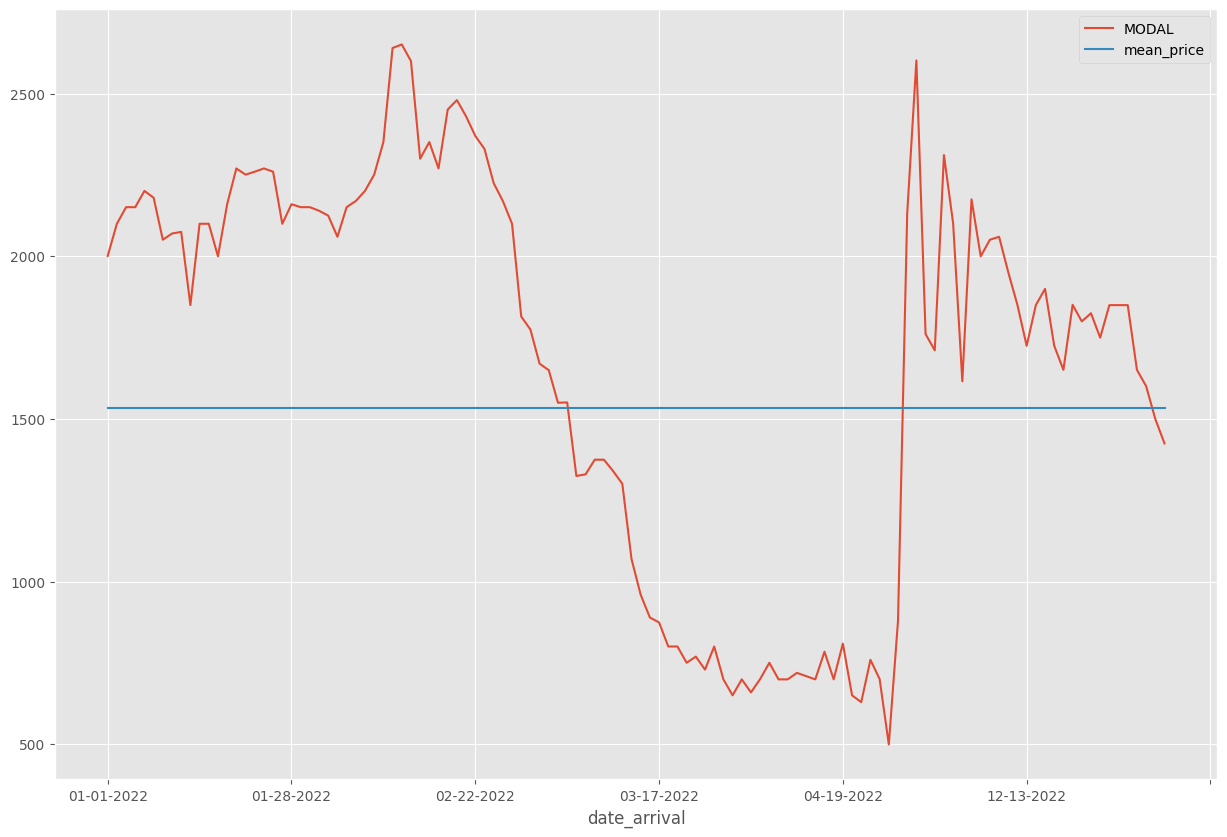

In [43]:
df_red.plot(kind="line", x="date_arrival", y=["MODAL", "mean_price"])

In [44]:
#EVALUATION:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [45]:
mean_modelRMSE = RMSE(df_red.MODAL, df_red.mean_price)
mean_modelRMSE

632.2985542794243

In [46]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Mean Model"
Result_df.loc[0,"Forcast"] = np.exp(df_red_mean)
Result_df.loc[0,"RMSE"] = mean_modelRMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,1533.51086,632.298554


In [69]:
# Converting the date into datetinme delta starting from 0
df_red["date_arrival"] = pd.to_datetime(df_red["date_arrival"])
df_red["timeindex"] = df_red.date_arrival - df_red.date_arrival.min()
df_red.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex
date_arrival,,,,,,,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,2022-01-01,7.601402,NaN,NaN,1533.51086,NaN,0 days
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,2022-01-03,7.649693,7.601402,0.048290,1533.51086,2001.0,2 days
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,2022-01-04,7.673688,7.649693,0.023996,1533.51086,2100.0,3 days
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,2022-01-05,7.673688,7.673688,0.000000,1533.51086,2151.0,4 days
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,2022-01-06,7.696667,7.673688,0.022979,1533.51086,2151.0,5 days


In [72]:
df_red["timeindex"] = df_red["timeindex"].round(0).astype(int)
df_red.tail()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex
date_arrival,,,,,,,,,,,,,,,,
2022-12-26,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1100,1300,2169,1850,2022-12-26,7.522941,7.522941,0.000000,1533.51086,1850.0,359
2022-12-28,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2054,700,2025,1651,2022-12-28,7.409136,7.522941,-0.113804,1533.51086,1850.0,361
2022-12-29,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1963,700,1900,1601,2022-12-29,7.378384,7.409136,-0.030753,1533.51086,1651.0,362
2022-12-30,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,38,700,1715,1500,2022-12-30,7.313220,7.378384,-0.065163,1533.51086,1601.0,363
2022-12-31,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1150,700,1808,1425,2022-12-31,7.261927,7.313220,-0.051293,1533.51086,1500.0,364


In [73]:
#Random Walk Model
df_red["shift_log_MODAL"] = df_red.log_MODAL.shift()
df_red.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex
date_arrival,,,,,,,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,2022-01-01,7.601402,NaN,NaN,1533.51086,NaN,0
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,2022-01-03,7.649693,7.601402,0.048290,1533.51086,2001.0,2
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,2022-01-04,7.673688,7.649693,0.023996,1533.51086,2100.0,3
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,2022-01-05,7.673688,7.673688,0.000000,1533.51086,2151.0,4
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,2022-01-06,7.696667,7.673688,0.022979,1533.51086,2151.0,5


<Axes: xlabel='shift_log_MODAL', ylabel='log_MODAL'>

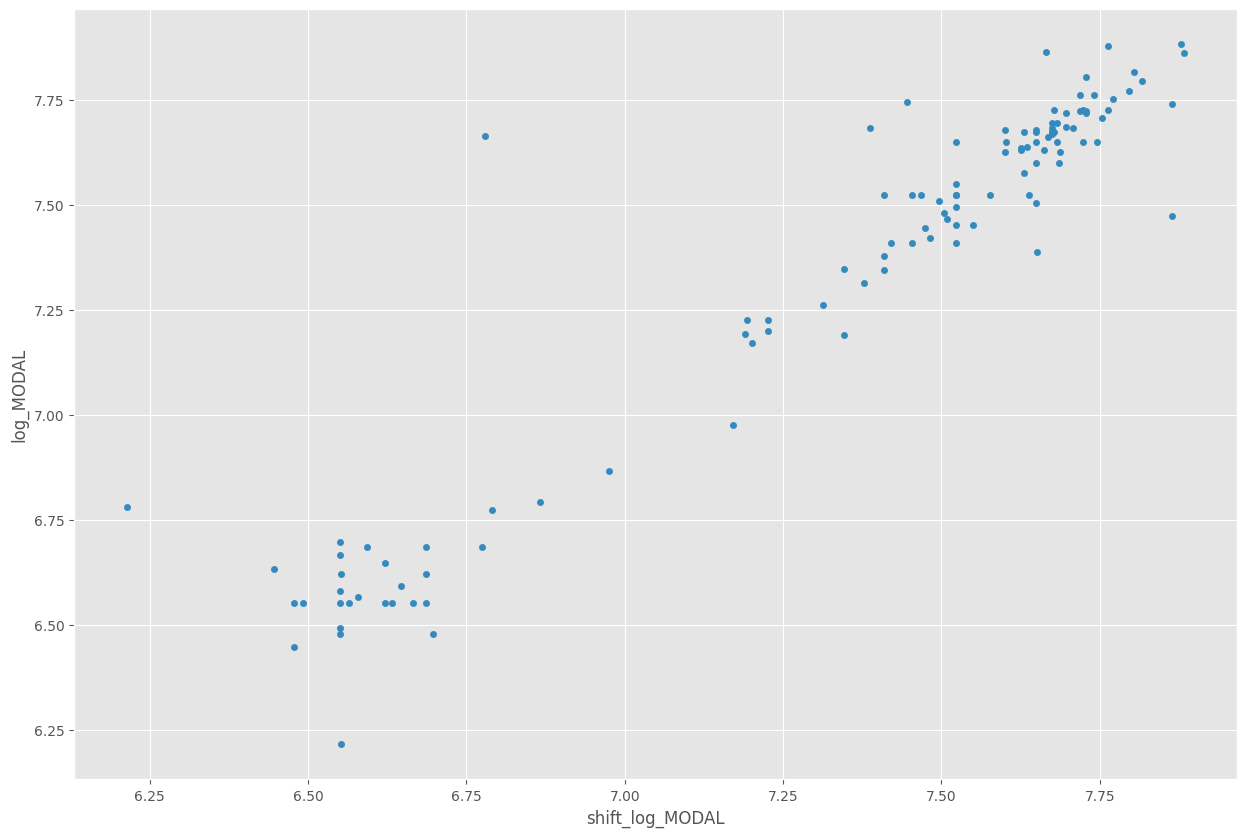

In [74]:
df_red.plot(kind="scatter", x="shift_log_MODAL", y ="log_MODAL", s=20 )

<Axes: xlabel='date_arrival'>

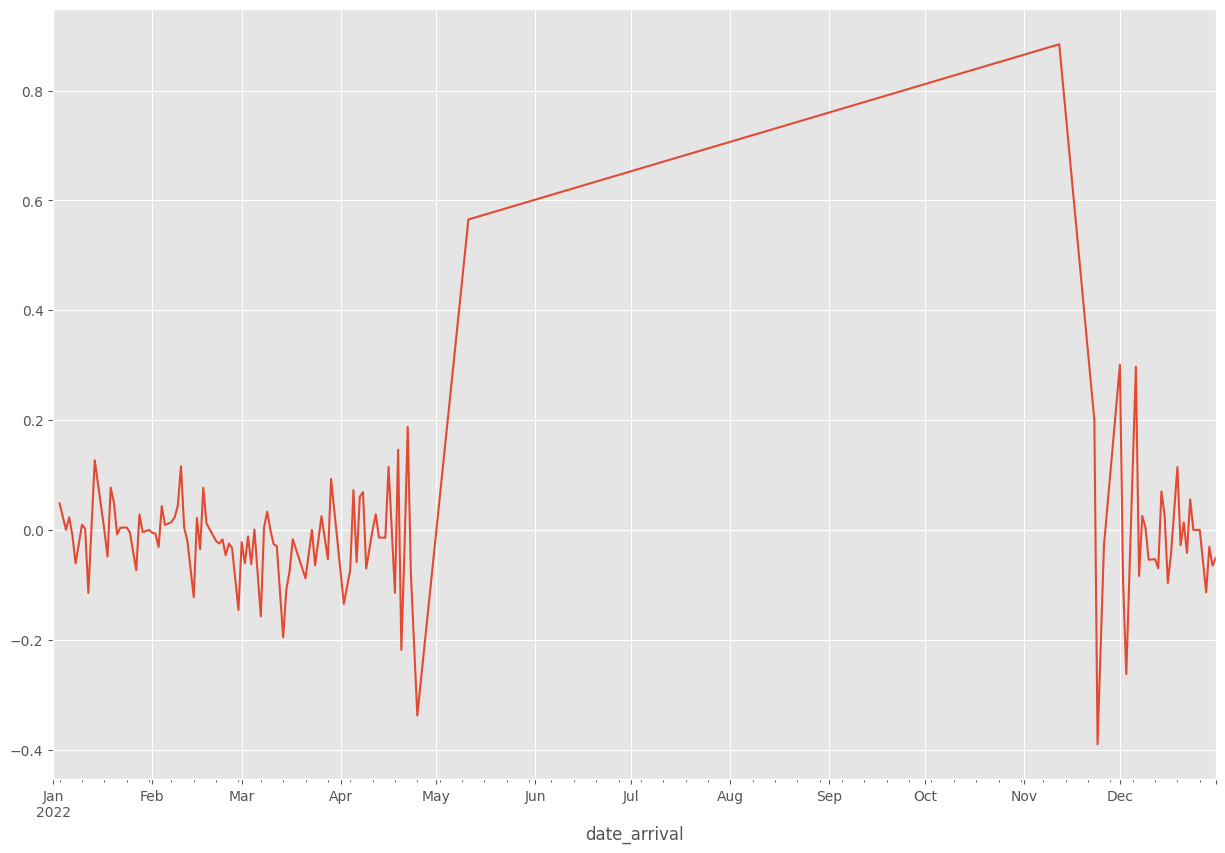

In [75]:
df_red["log_MODAL_diff"] = df_red.log_MODAL - df_red.shift_log_MODAL
df_red.log_MODAL_diff.plot()

In [78]:
df_red["random_price"] = np.exp(df_red.shift_log_MODAL)
df_red.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex
date_arrival,,,,,,,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,2022-01-01,7.601402,NaN,NaN,1533.51086,NaN,0
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,2022-01-03,7.649693,7.601402,0.048290,1533.51086,2001.0,2
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,2022-01-04,7.673688,7.649693,0.023996,1533.51086,2100.0,3
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,2022-01-05,7.673688,7.673688,0.000000,1533.51086,2151.0,4
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,2022-01-06,7.696667,7.673688,0.022979,1533.51086,2151.0,5


<Axes: xlabel='timeindex'>

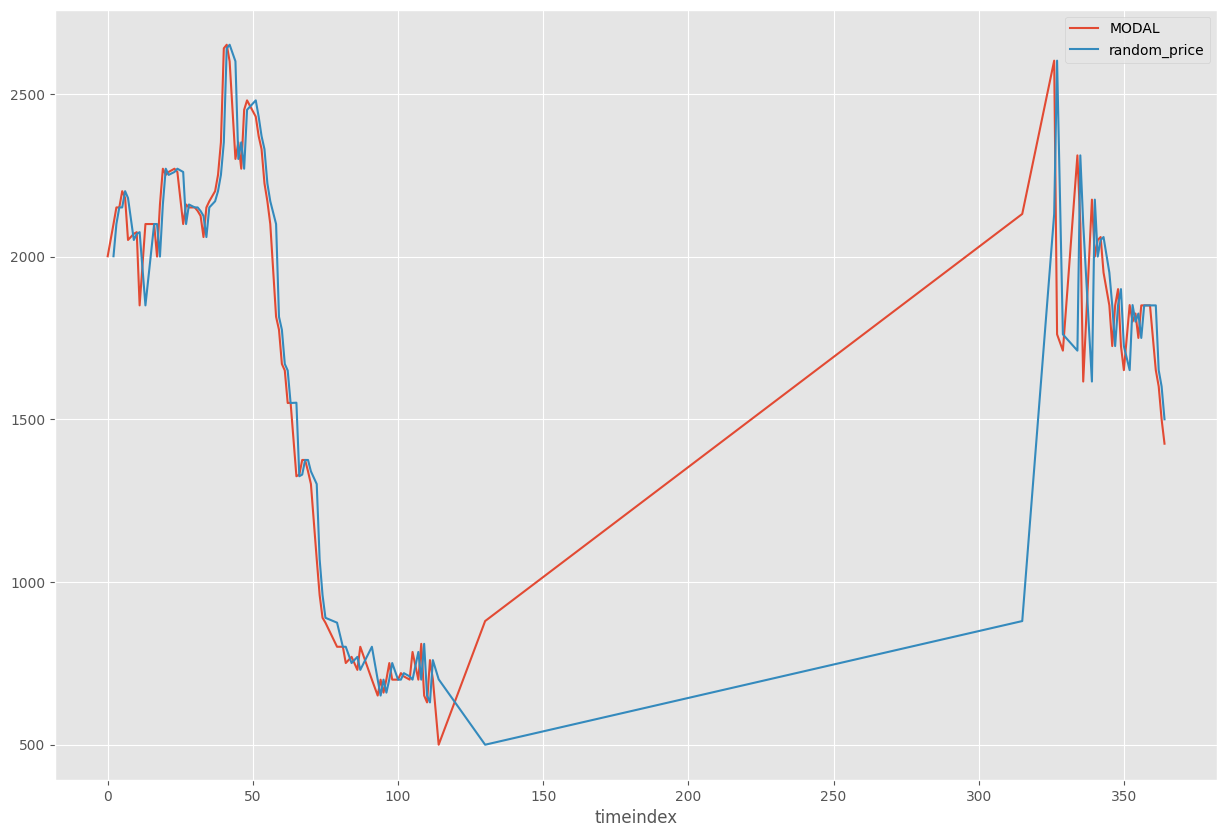

In [79]:
# comparing random price and actual price
df_red.plot(kind="line", x="timeindex", y = ["MODAL", "random_price"])

In [80]:
# evaluate the random walk model
random_model_RMSE = RMSE(df_red.MODAL, df_red.random_price)
random_model_RMSE

202.4420904851558

In [81]:
Result_df.loc[2,"Model"] = "Random Model"
Result_df.loc[2,"Forcast"] = np.exp(df_red.shift_log_MODAL[-1])
Result_df.loc[2,"RMSE"] = random_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Mean Model,1533.51086,632.298554
2,Random Model,1500.0,202.44209


<Axes: xlabel='timeindex'>

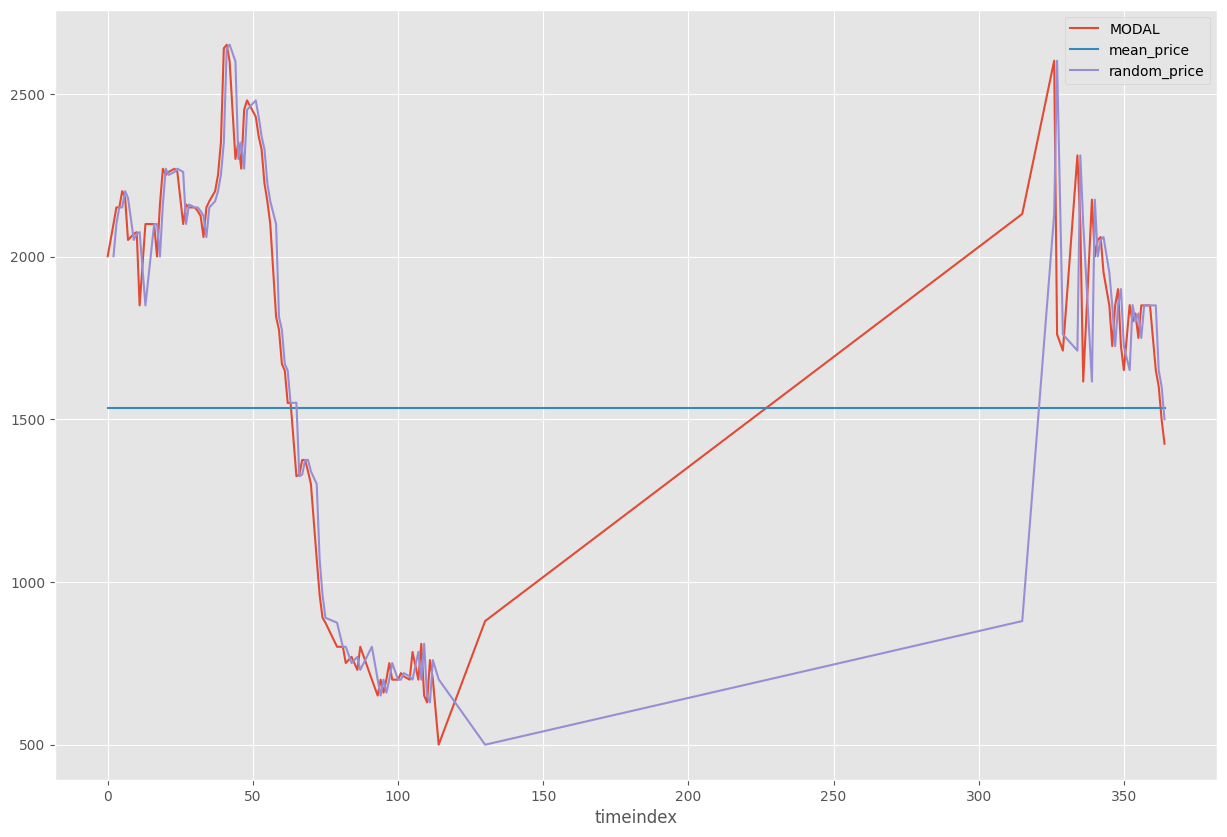

In [83]:
df_red.plot(kind="line", x="timeindex", y = ["MODAL", "mean_price", "random_price"])

<Axes: xlabel='date_arrival'>

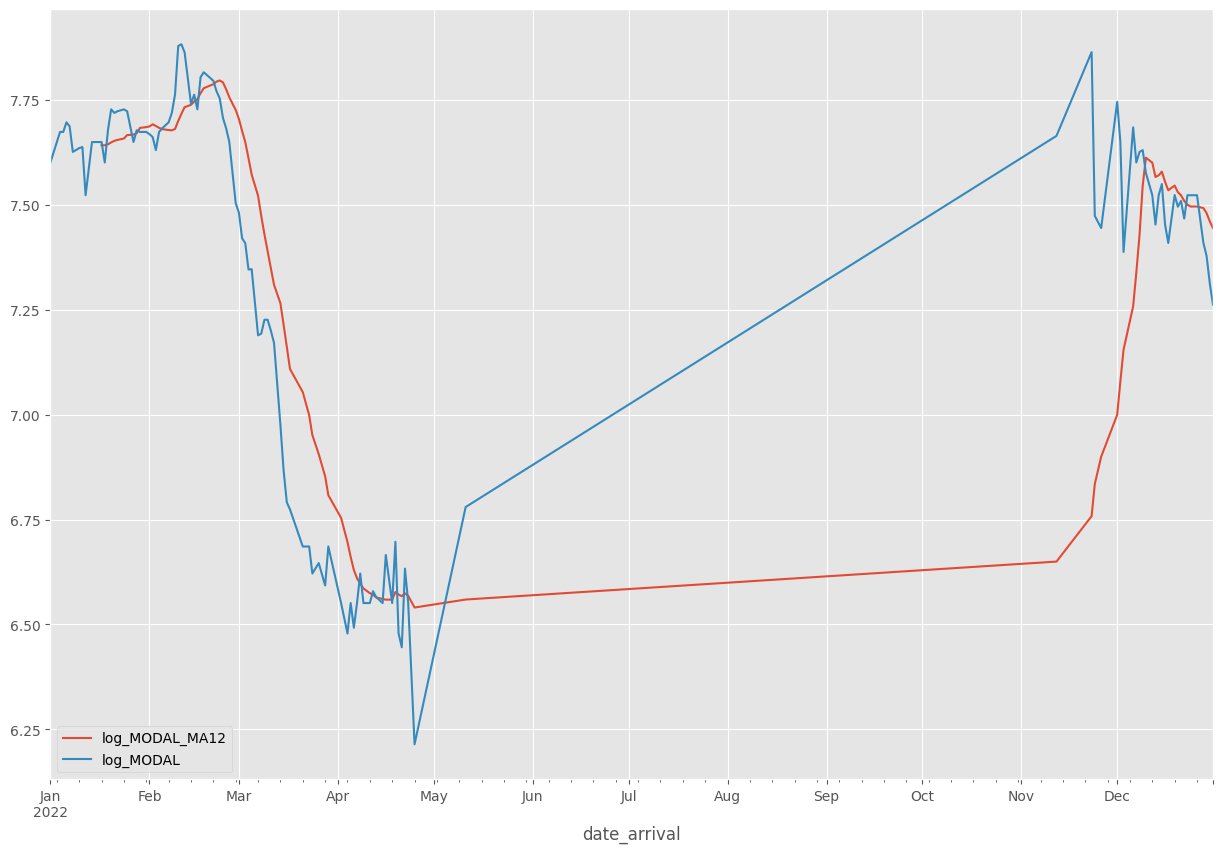

In [84]:
#Moving Average
# smoothing the value using 12 month moving average
df_red["log_MODAL_MA12"] = df_red.log_MODAL.rolling(12).mean()
df_red.plot(kind="line", y=["log_MODAL_MA12", "log_MODAL"])

In [85]:
df_red["MA12_price"] = np.exp(df_red.log_MODAL_MA12)
df_red.sample(5)

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex,log_MODAL_MA12,MA12_price
date_arrival,,,,,,,,,,,,,,,,,,
2022-04-09,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1107,300,912,700,2022-04-09,6.551080,6.621406,-0.070325,1533.51086,751.0,98,6.585872,724.782941
2022-03-09,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2240,700,1655,1375,2022-03-09,7.226209,7.192934,0.033275,1533.51086,1330.0,67,7.429597,1685.129106
2022-04-15,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1105,400,841,700,2022-04-15,6.551080,6.565265,-0.014185,1533.51086,710.0,104,6.560870,706.886526
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,2022-01-01,7.601402,NaN,NaN,1533.51086,NaN,0,NaN,NaN
2022-01-25,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2872,700,2512,2260,2022-01-25,7.723120,7.727535,-0.004415,1533.51086,2270.0,24,7.666213,2134.980355


In [86]:
MA_model_forcast = df_red.log_MODAL_MA12.tail(12).mean()

In [87]:
MA12_model_RMSE = RMSE(df_red.MODAL, df_red.MA12_price)
MA12_model_RMSE

361.22918496804067

In [88]:
Result_df.loc[3,"Model"] = "Moving Average 12"
Result_df.loc[3,"Forcast"] = np.exp(MA_model_forcast)
Result_df.loc[3,"RMSE"] = MA12_model_RMSE
Result_df.head()

,Model,Forcast,RMSE
0,Mean Model,1533.51086,632.298554
2,Random Model,1500.0,202.44209
3,Moving Average 12,1810.082068,361.229185


<Axes: xlabel='timeindex'>

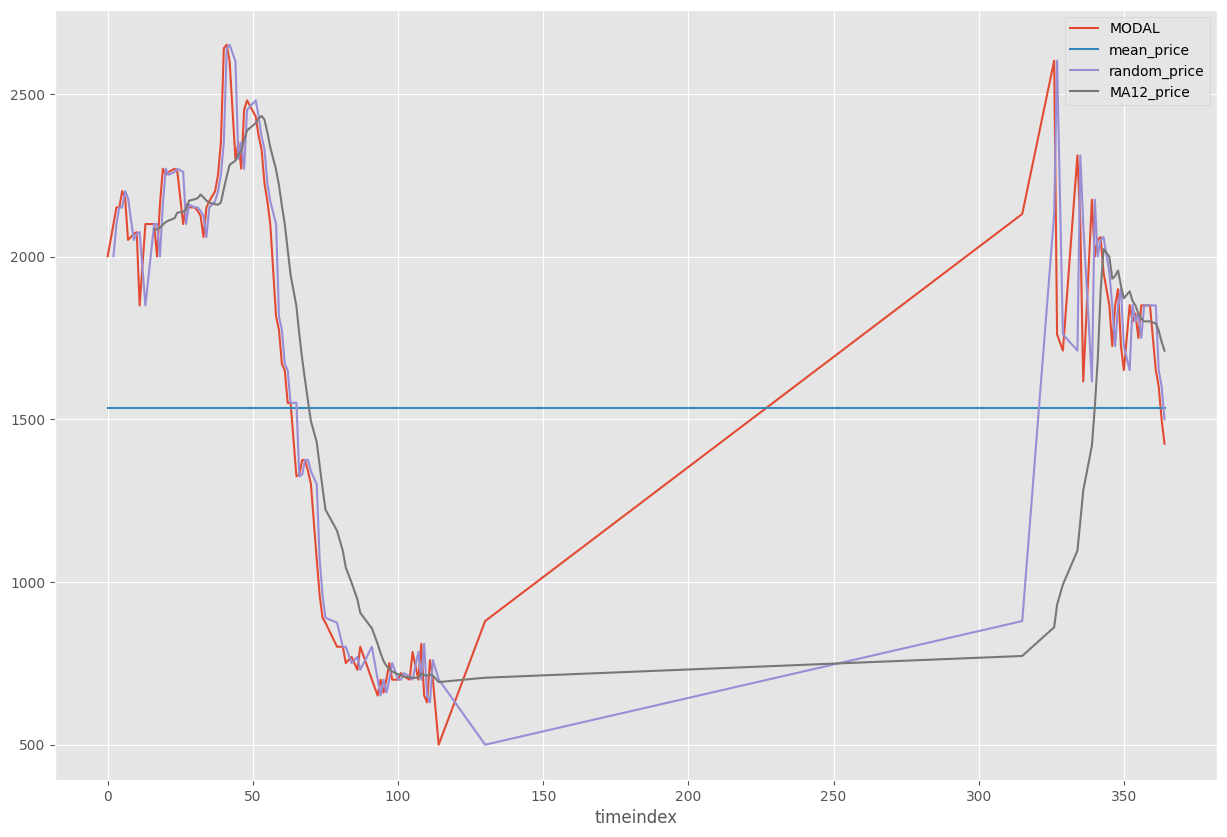

In [89]:
df_red.plot(kind="line", x="timeindex", y = ["MODAL", "mean_price", "random_price", "MA12_price"])

In [92]:
def adf(ts):
    # Determing rolling statistics
    rolmean = ts.rolling(window=12).mean()
    rolstd = ts.rolling(window=12).std()

    #Plot rolling statistics:
    ts.plot(color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Calculate ADF factors
    adftest = adfuller(ts, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','# of Lags Used',
                                              'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)'%key] = value
    return adfoutput

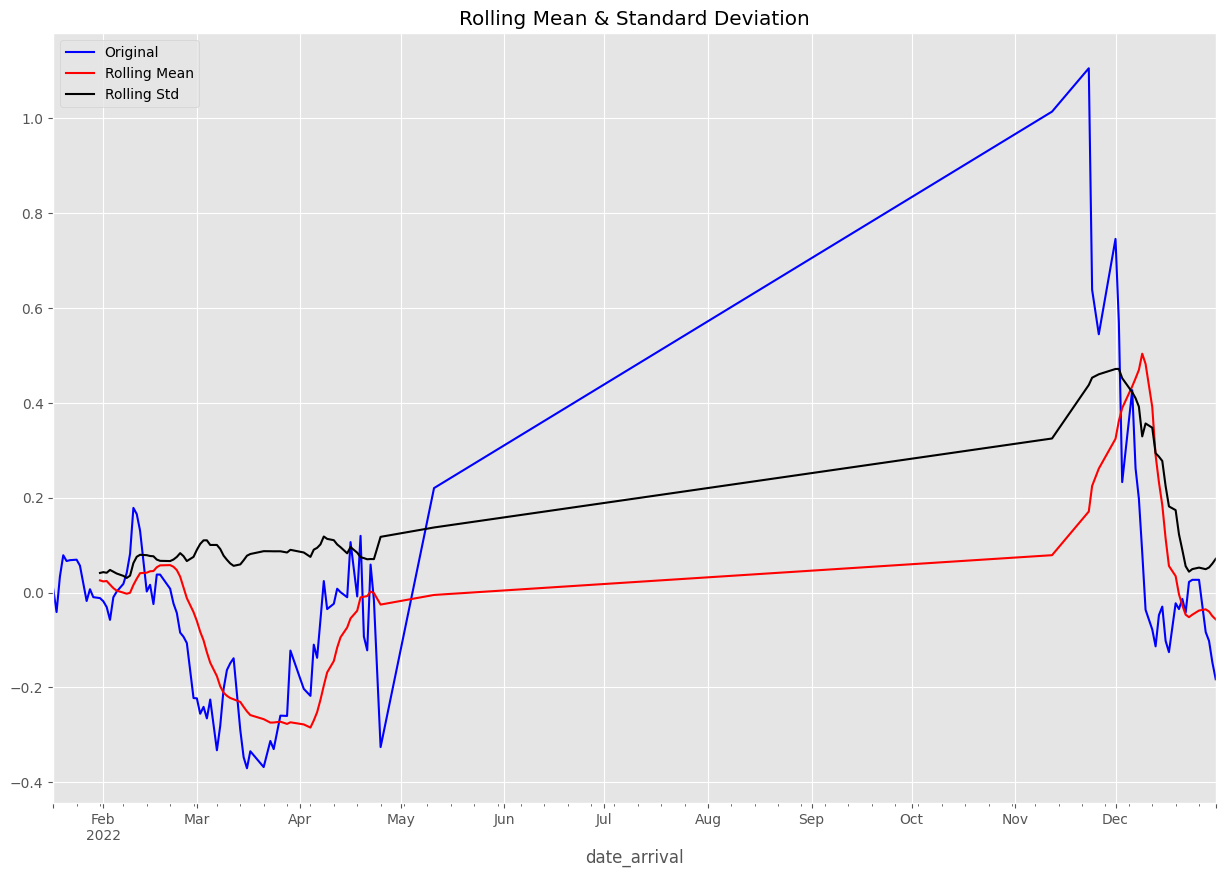

Test Statistic                  -2.811087
p-value                          0.056707
# of Lags Used                   4.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

In [94]:
# Test remaining part for Stationary
ts = df_red.log_MODAL - df_red.log_MODAL_MA12
ts.dropna(inplace= True)
adf(ts)

<Axes: xlabel='date_arrival'>

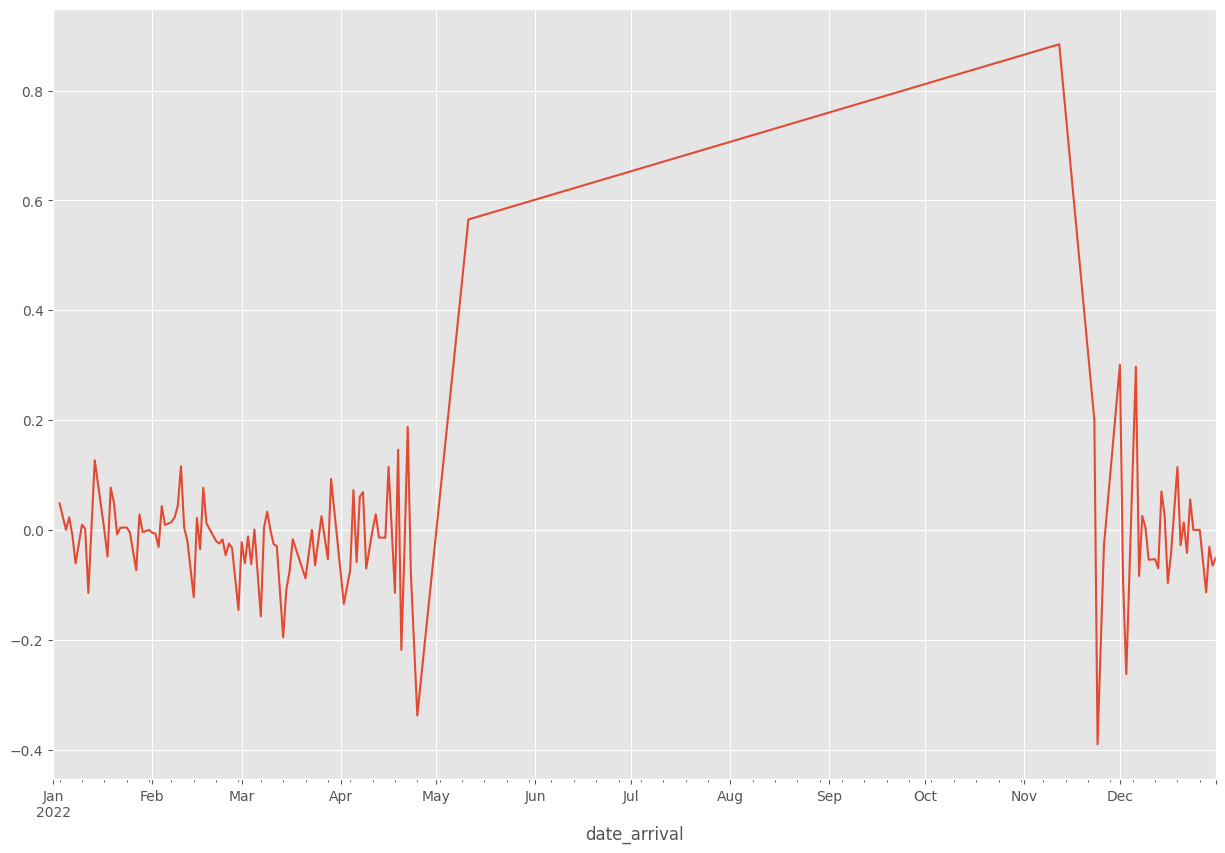

In [95]:
#Differencing
df_red.log_MODAL_diff.plot()

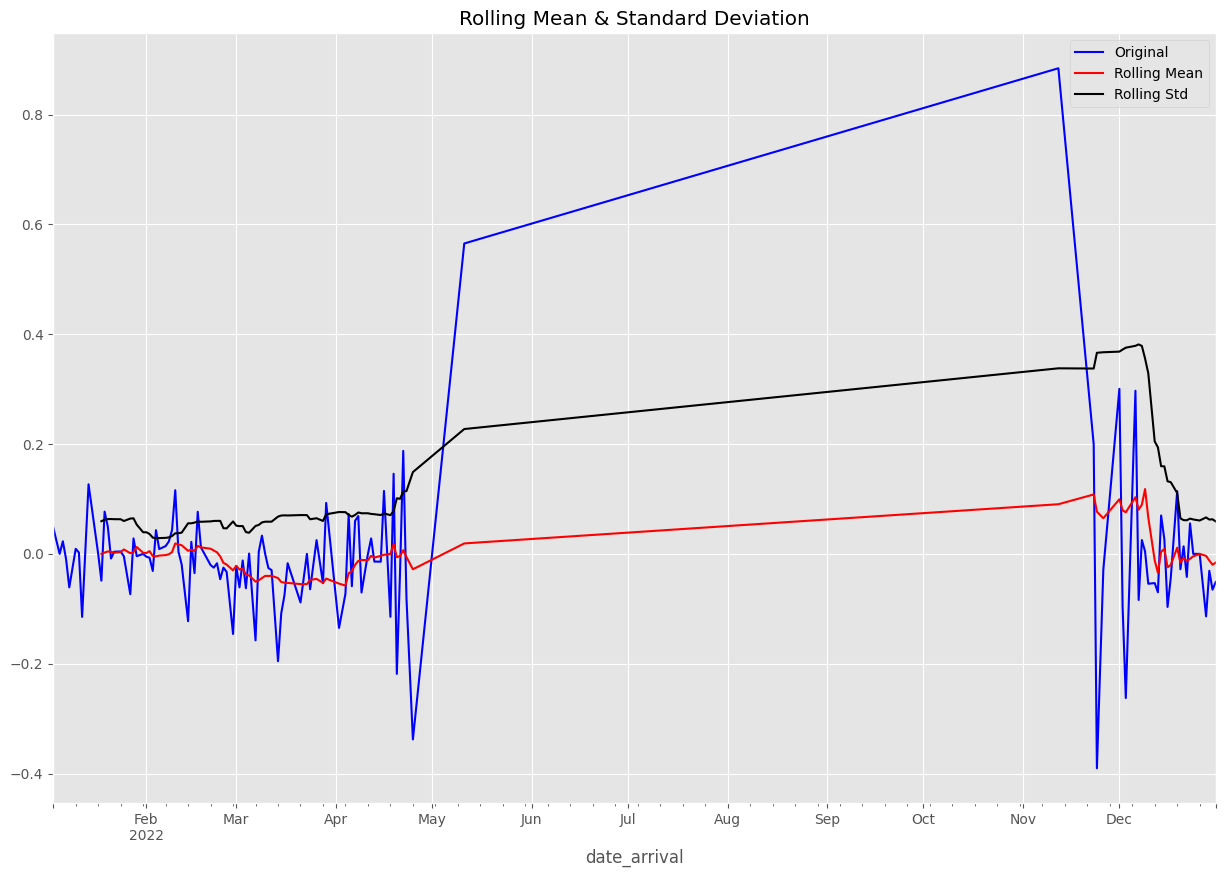

Test Statistic                  -4.839817
p-value                          0.000046
# of Lags Used                   4.000000
Number of Observations Used    110.000000
Critical Value (1%)             -3.491245
Critical Value (5%)             -2.888195
Critical Value (10%)            -2.580988
dtype: float64

In [96]:
# Test remaining part for Stationary
ts = df_red.log_MODAL_diff
ts.dropna(inplace = True)
adf(ts)

In [97]:
#Time Series Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

df_red.index = pd.to_datetime(df_red.date_arrival)
df_red.head()

,state_name,district_name,market_center_name,Variety,group_name,Arrival,MIN,MAX,MODAL,date_arrival,log_MODAL,shift_log_MODAL,log_MODAL_diff,mean_price,random_price,timeindex,log_MODAL_MA12,MA12_price
date_arrival,,,,,,,,,,,,,,,,,,
2022-01-01,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,1095,700,2355,2001,2022-01-01,7.601402,NaN,NaN,1533.51086,NaN,0,NaN,NaN
2022-01-03,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2153,700,2368,2100,2022-01-03,7.649693,7.601402,0.048290,1533.51086,2001.0,2,NaN,NaN
2022-01-04,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2207,851,2424,2151,2022-01-04,7.673688,7.649693,0.023996,1533.51086,2100.0,3,NaN,NaN
2022-01-05,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2297,800,2525,2151,2022-01-05,7.673688,7.673688,0.000000,1533.51086,2151.0,4,NaN,NaN
2022-01-06,Maharashtra,Nashik,Lasalgaon,Red,Vegetables,2385,800,2585,2201,2022-01-06,7.696667,7.673688,0.022979,1533.51086,2151.0,5,NaN,NaN


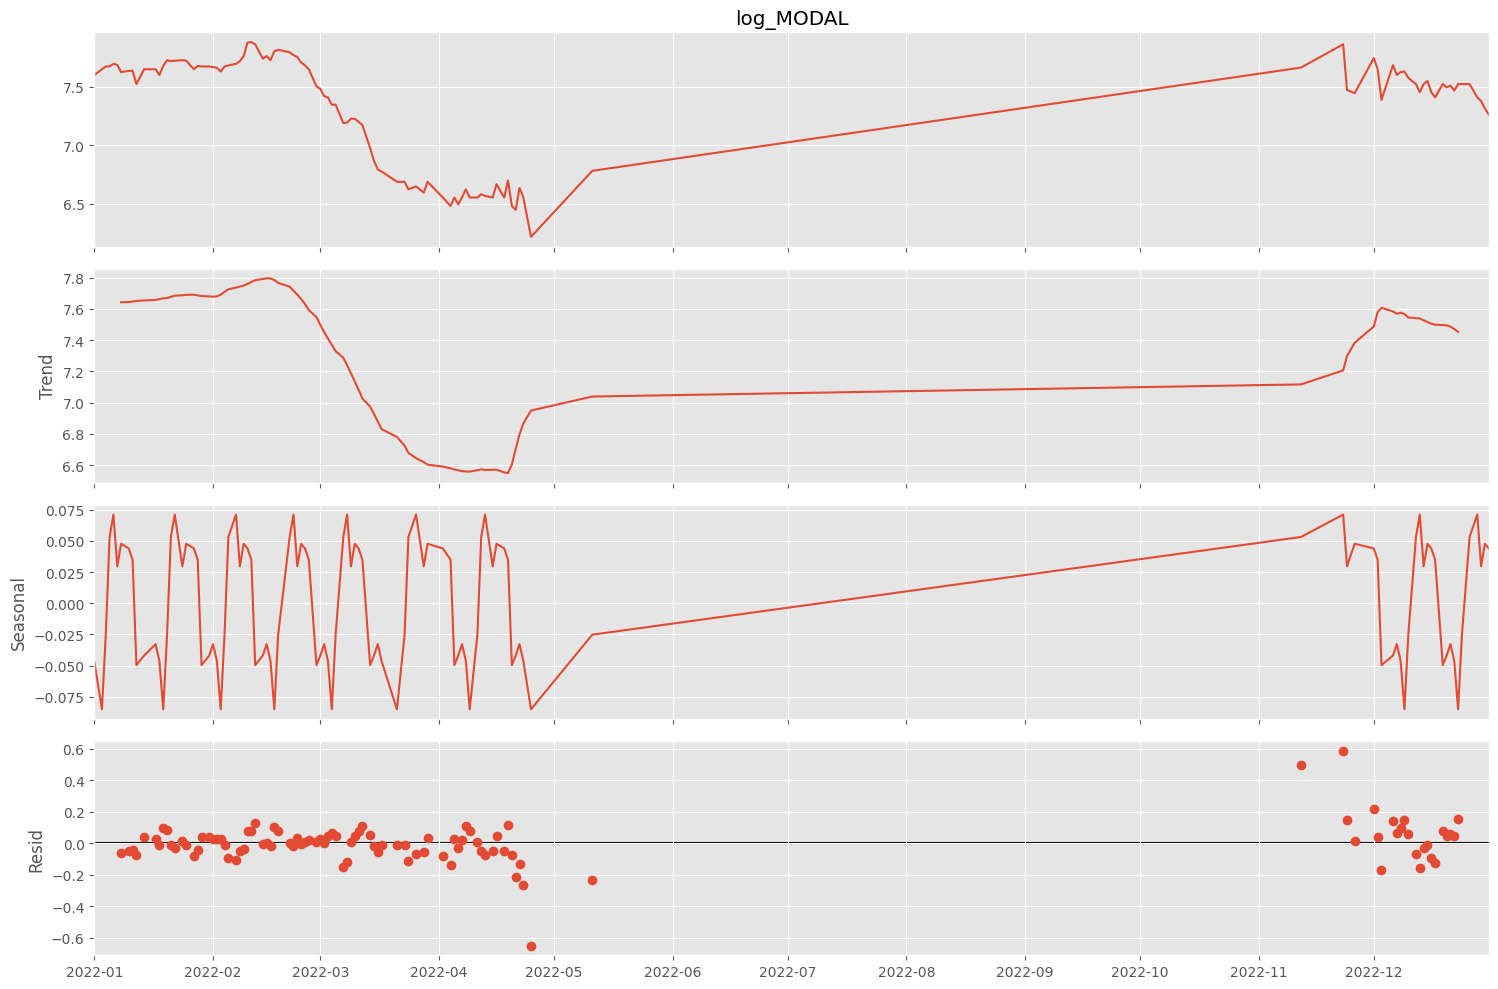

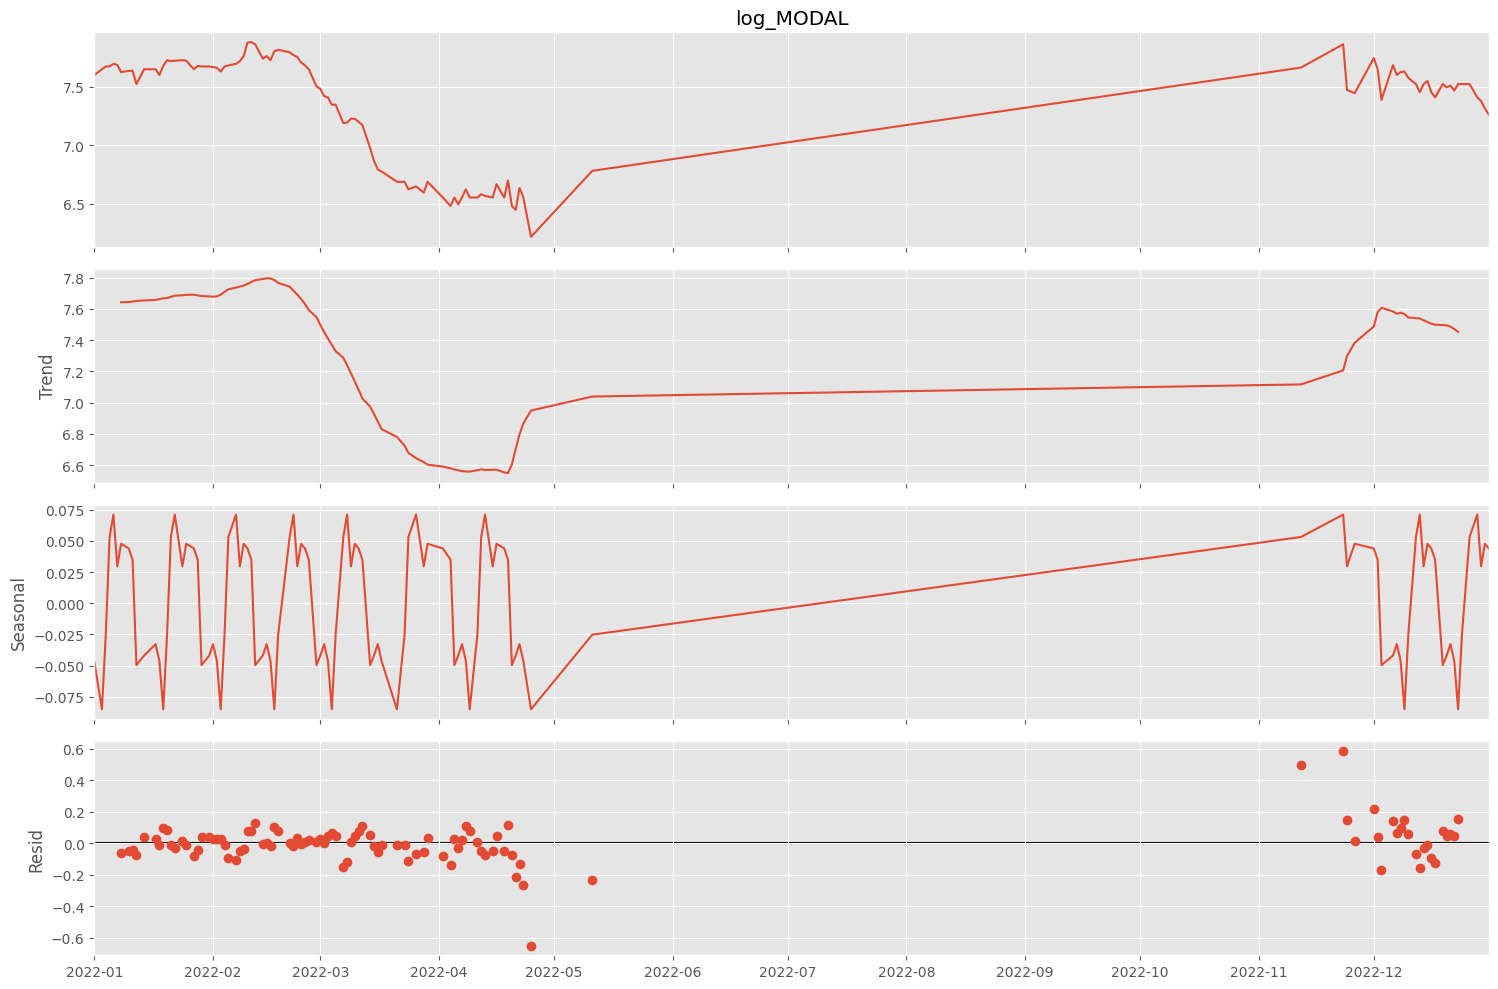

In [102]:
decomposition = seasonal_decompose(df_red.log_MODAL, model = "additive", period = 12)
decomposition.plot()

In [103]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [104]:
df_red["decomp_price"] = np.exp(trend + seasonal)
decomp_model_RMSE = RMSE(df_red.MODAL, df_red.decomp_price)
decomp_model_RMSE

197.65105894158134

<Axes: xlabel='timeindex'>

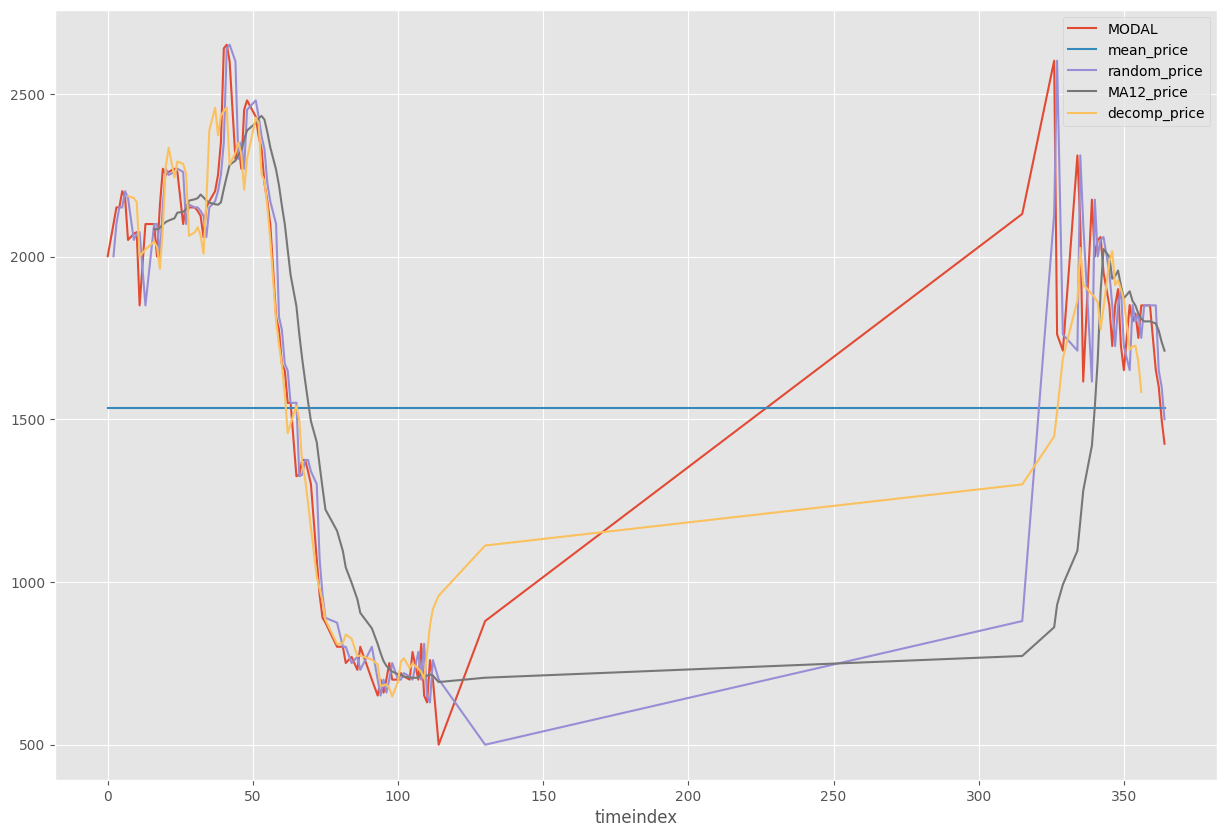

In [106]:
df_red.plot(kind="line", x="timeindex", y = ["MODAL", "mean_price", "random_price",
                                             "MA12_price", "decomp_price"])

In [107]:
#ARIMA
ts = df_red.log_MODAL
ts_diff = df_red.log_MODAL_diff
ts_diff.dropna(inplace = True)

In [108]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

array([ 1.        ,  0.12387266, -0.37001927,  0.00269838,  0.28608217,
       -0.07658479, -0.16349856,  0.04428281,  0.16544181, -0.04337925,
       -0.00644957,  0.08573997, -0.04684645, -0.08170125,  0.08873122,
        0.03198917,  0.00234317, -0.02597392,  0.05326321,  0.00837896,
       -0.096036  ])

<Axes: >

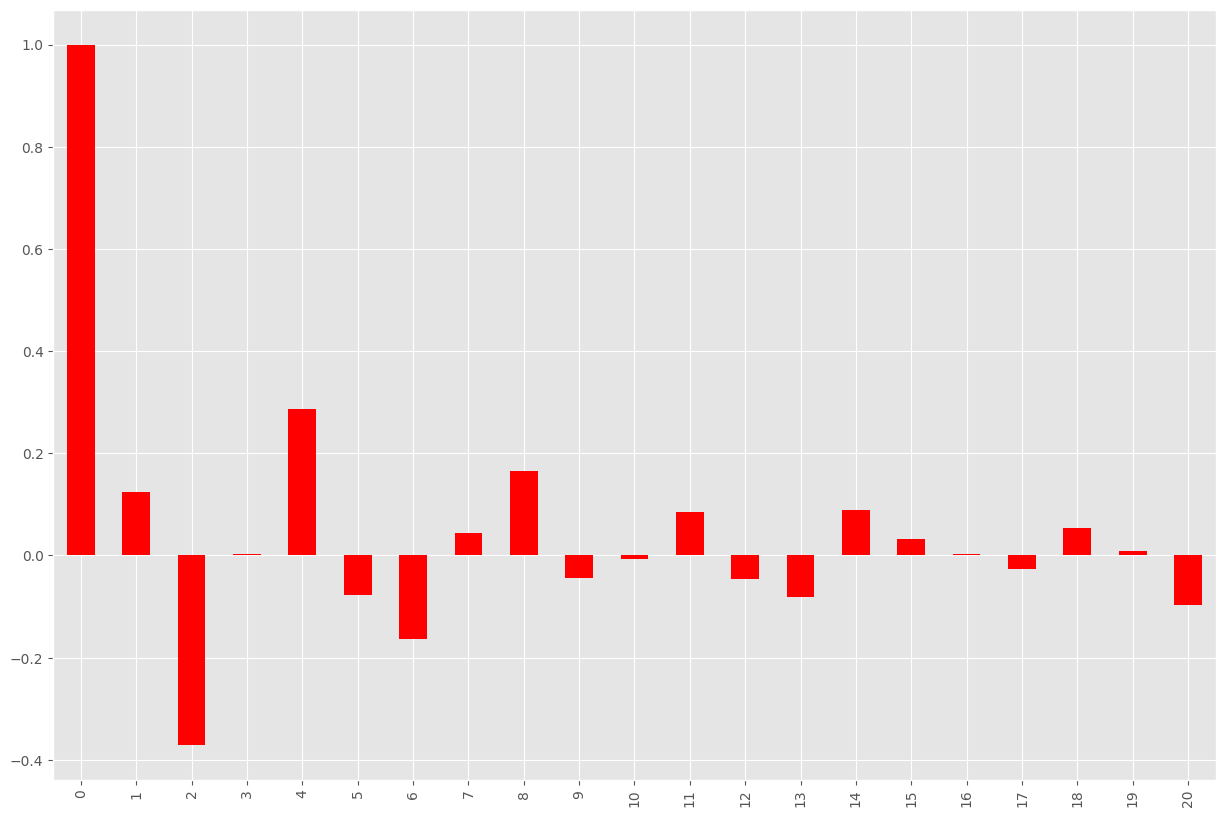

In [109]:
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar", color="red")

<Axes: >

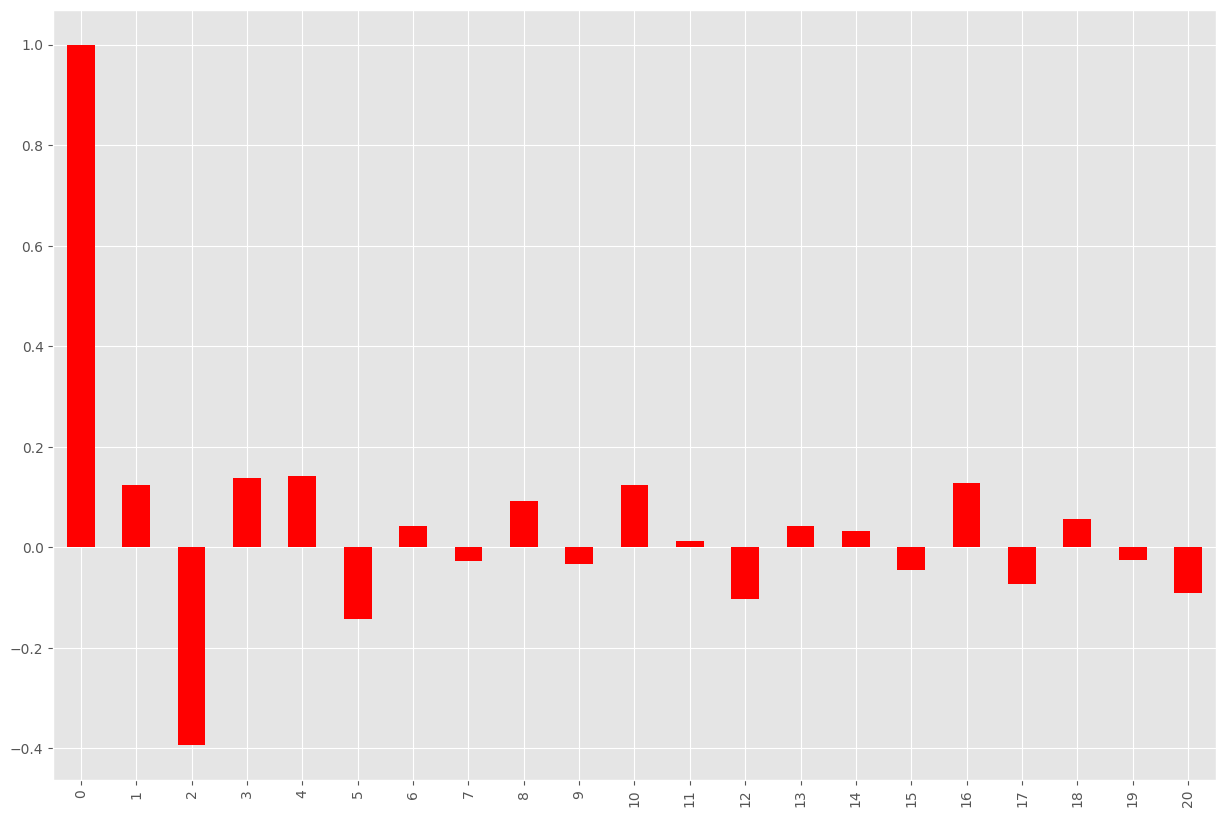

In [110]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar", color="red")

In [120]:
import statsmodels.api as smapi

In [121]:
ts_diff.head()

date_arrival
2022-01-03    0.048290
2022-01-04    0.023996
2022-01-05    0.000000
2022-01-06    0.022979
2022-01-07   -0.009587
Name: log_MODAL_diff, dtype: float64

In [122]:
model = smapi.tsa.arima.ARIMA(ts_diff, order=(1,1,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [125]:
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: xlabel='date_arrival'>

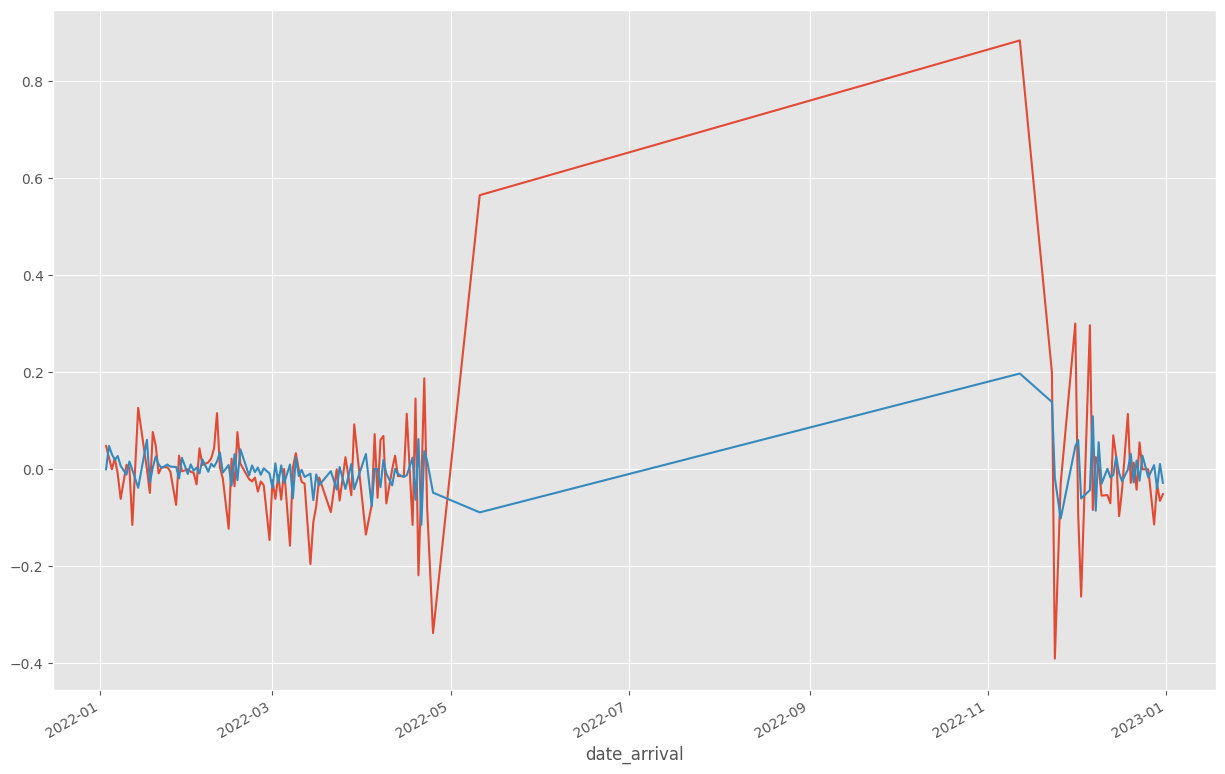

In [126]:
ts_diff.plot()
result.fittedvalues.plot()

In [127]:
ts_diff.sum()

-0.3394752418809821

In [128]:
predictions_ARIMA_diff = pd.Series(result.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date_arrival
2022-12-26   -0.016800
2022-12-28    0.008674
2022-12-29   -0.039205
2022-12-30    0.011020
2022-12-31   -0.027819
dtype: float64

In [129]:
predictions_ARIMA_diff.sum()

-0.2026817123744616

In [130]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date_arrival
2022-12-26   -0.155352
2022-12-28   -0.146677
2022-12-29   -0.185882
2022-12-30   -0.174862
2022-12-31   -0.202682
dtype: float64

In [132]:
predictions_ARIMA_log = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.tail()

date_arrival
2022-12-26    7.446051
2022-12-28    7.454725
2022-12-29    7.415520
2022-12-30    7.426540
2022-12-31    7.398721
dtype: float64

<Axes: xlabel='timeindex'>

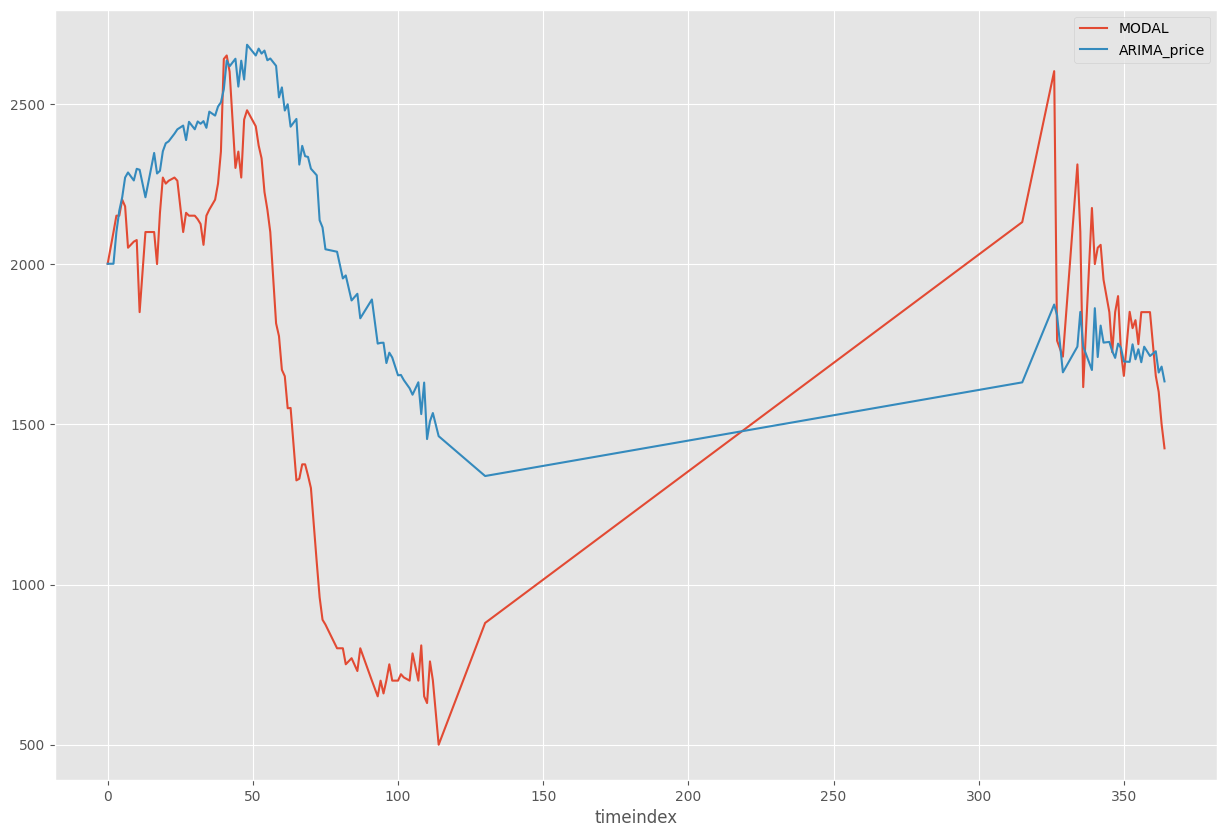

In [133]:
df_red["ARIMA_price"] = np.exp(predictions_ARIMA_log)
df_red.plot(kind="line", x="timeindex", y=["MODAL", "ARIMA_price"])

<Axes: xlabel='timeindex'>

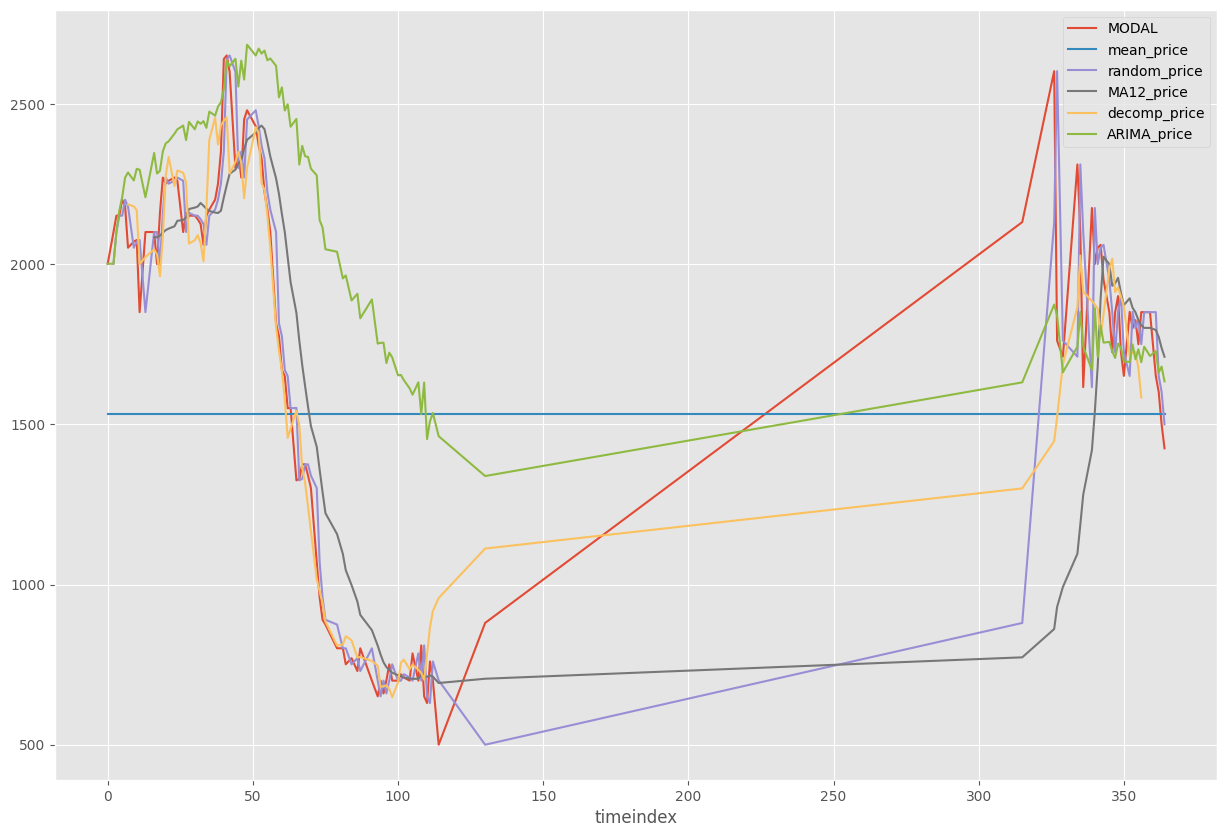

In [136]:
df_red.plot(kind="line", x="timeindex", y = ["MODAL", "mean_price", "random_price",
                                             "MA12_price", "decomp_price", "ARIMA_price"])